# 1. Introduction

## 1.1 Problem Statement

Analisis conversion rate merupakan suatu pencarian insight data persentase pengunjung website serta tindakann apa saja yang mereka lakukan selama mengunjungi situs, dan apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama berkunjung di website tersebut, hal in dapat dilakukan dengan melakukan featire engeenering pada variable data yang tersaji, sehingga dapat menghasilkan satu kolom baru yaitu Conversion rate.

Setelah Conversion rate terbentuk, maka dapat dianalisis dengan variable lain seperti umur, penghasilan, pengeluaran, dll. sehingga dapat menemukan suatu pola perilaku konsumen.

# 2.0 EDA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [7]:
# Membaca dataset
df = pd.read_csv('../data/marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [8]:
# Feature Engineering: Membuat kolom Conversion_Rate
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Conversion_Rate'] = df['Total_Purchases'] / df['NumWebVisitsMonth']

In [9]:
# Menghitung umur berdasarkan Year_Birth
year_now = datetime.date.today().year
df['Age'] = year_now - df['Year_Birth']

In [10]:
# Mengelompokkan umur
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Setengah Baya', 'Lanjut Usia']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

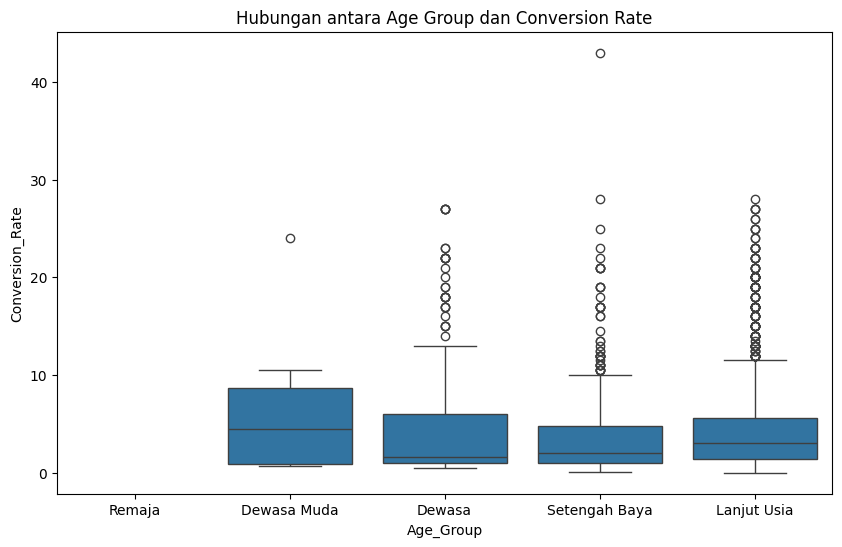

In [11]:
# Plot hubungan antara Conversion Rate dan Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Conversion_Rate', data=df)
plt.title('Hubungan antara Age Group dan Conversion Rate')
plt.show()

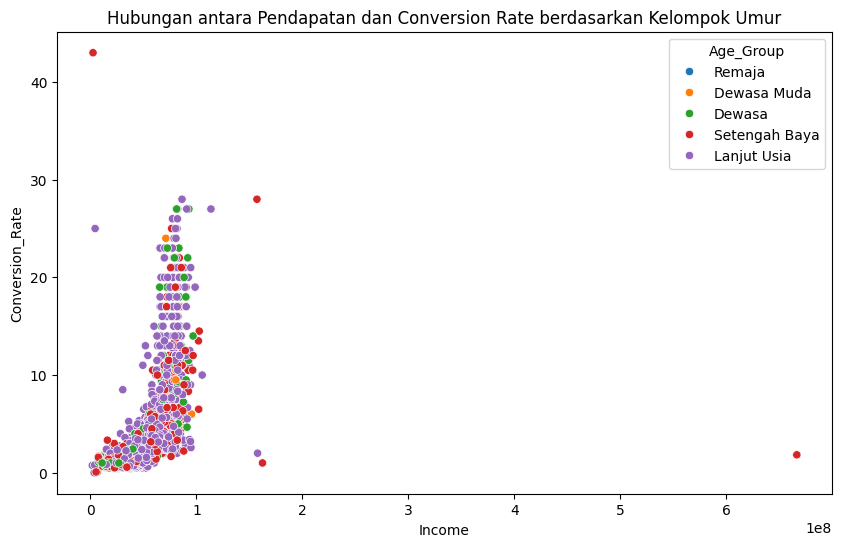

In [12]:
# Plot tambahan bisa dilakukan untuk pendapatan atau variabel lainnya
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Conversion_Rate', hue='Age_Group', data=df)
plt.title('Hubungan antara Pendapatan dan Conversion Rate berdasarkan Kelompok Umur')
plt.show()

In [13]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Conversion_Rate,Age,Age_Group
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,3,11,1,25,3.571429,67,Lanjut Usia
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,3,11,0,6,1.200000,70,Lanjut Usia
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,3,11,0,21,5.250000,59,Lanjut Usia
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,3,11,0,8,1.333333,40,Dewasa
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,3,11,0,19,3.800000,43,Setengah Baya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,3,11,0,18,3.600000,57,Lanjut Usia
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,1,0,0,3,11,0,22,3.142857,78,Lanjut Usia
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,3,11,0,19,3.166667,43,Setengah Baya
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,3,11,0,23,7.666667,68,Lanjut Usia
